Reference video: 
https://www.youtube.com/watch?v=ZhoIgo3qqLU&list=PL58zEckBH8fBW_XLPtIPlQ-mkSNNx0tLS&index=1

In [2]:
# Import necessary libraries
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

### Displaying the map with the character

In [6]:
def frozen_lake():
    env = gym.make('FrozenLake-v1', map_name='8x8', is_slippery=True, render_mode='human')
    
    state = env.reset()[0]  # States: 0 to 63, 0-top left corner and 63-bottom right corner
    terminated = False      # True when the agent falls into a hole or reaches the goal
    truncated = False       # True when action > 200
    
    while(not terminated and not truncated):
        action = env.action_space.sample()  # Actions: 0-left, 1-down, 2-right, 3-up
        
        new_state, reward, terminated, truncated, _ = env.step(action)
        
        state = new_state
    
    env.close()

In [7]:
# Run frozen lake
frozen_lake()

### Training with Q Table

We modify the previous function

In [64]:
def frozen_lake(name, episodes, is_training=True, render=False, slippery=False):
    env = gym.make('FrozenLake-v1', map_name='8x8', is_slippery=slippery, render_mode='human' if render else None)
    
    # Define Q Table
    if is_training:
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else:
        f = open(f'q_tables/frozen_lake_{name}.pkl', 'rb')
        q = pkl.load(f)
        f.close()
    
    # Define the hyperparameters
    learning_rate_a = 0.9   # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount factor
    
    # Define policy parameters: we use the Epsilon Greedy Algorithm
    epsilon = 1                     # 1 = 100% random actions
    epsilon_decay_rate = 0.0001     # decay rate of epsilon
    rng = np.random.default_rng()   # random number generator
    
    # Keep track of the rewards per episode
    rewards_per_episode = np.zeros(episodes)
    
    # Iterate through all episodes
    for i in range(episodes):
        state = env.reset()[0]  # States: 0 to 63, 0-top left corner and 63-bottom right corner
        terminated = False      # True when the agent falls into a hole or reaches the goal
        truncated = False       # True when action > 200
        
        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample()  # Actions: 0-left, 1-down, 2-right, 3-up
            else:
                action = np.argmax(q[state, :])
            
            new_state, reward, terminated, truncated, _ = env.step(action)
            
            # Apply the Q Learning formula after taking a step
            if is_training:
                q[state, action] = q[state, action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
                )
            
            state = new_state
        
        # Decrease epsilon after each episode until it reaches 0
        epsilon = max(epsilon - epsilon_decay_rate, 0)  
        
        # Decrease the learning rate if epsilon reaches 0
        if epsilon == 0:
            learning_rate_a = 0.0001
            
        # Set episode reward to 1 if reward = 1
        if reward == 1:
            rewards_per_episode[i] = 1
    
    # Close the environment
    env.close()
    
    # Plot the rewards per episode graph
    if render == False:
        sum_rewards = np.zeros(episodes)
        for t in range(episodes):
            sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
        plt.xlabel('Episodes')
        plt.ylabel('Rewards (%)')
        plt.plot(sum_rewards)
    
    # Save the Q Table
    if is_training:
        f = open(f'q_tables/frozen_lake_{name}.pkl', 'wb')
        pkl.dump(q, f)
        f.close()

#### Slippery factor off

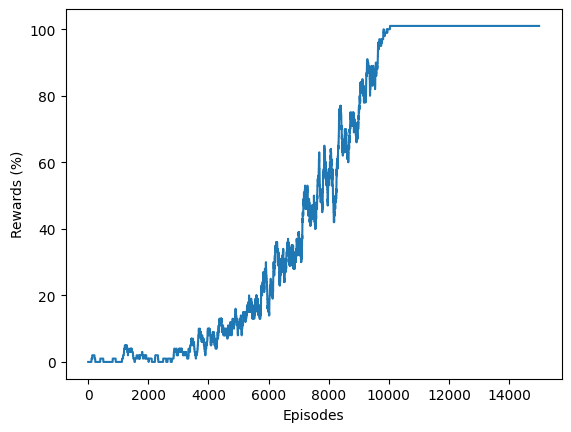

In [66]:
# Train with 15000 episodes
name = 'non_slippery'
frozen_lake(name, 15000)

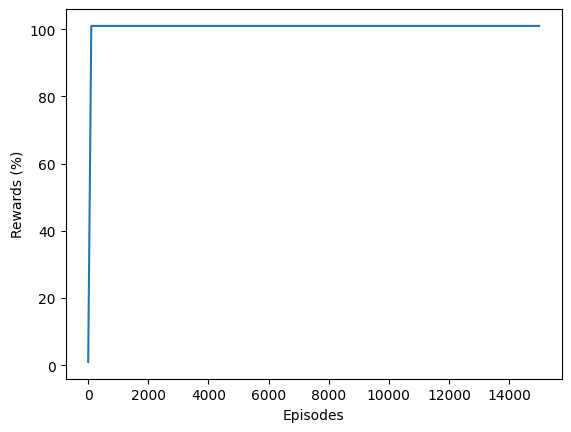

In [67]:
# Test with our Q Table
frozen_lake(name, 15000, is_training=False)

In [74]:
# Display the UI
name = 'non_slippery'
frozen_lake(name, 3, is_training=False, render=True)

#### Slippery factor on

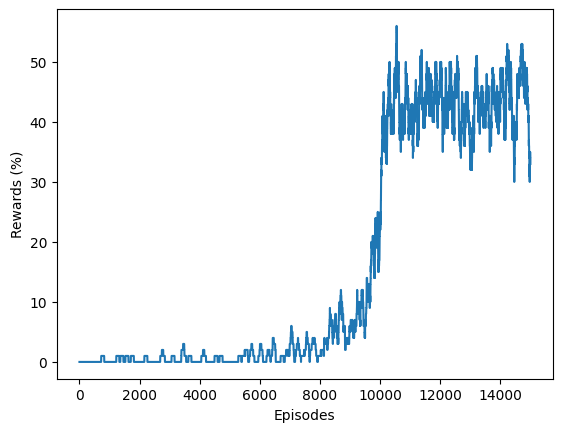

In [69]:
# Train with slippery factor on
name = 'slippery'
frozen_lake(name, 15000, slippery=True)

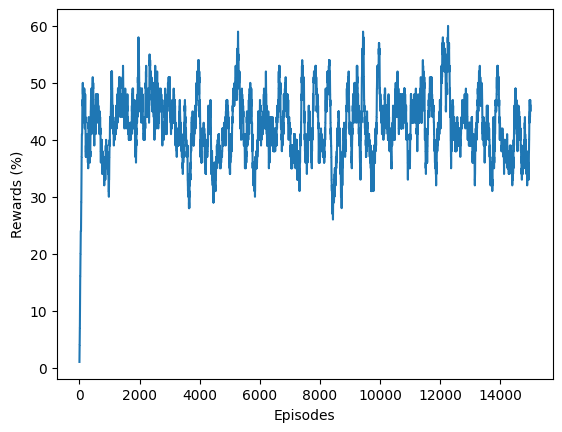

In [70]:
# Test with the Q Table
frozen_lake(name, 15000, is_training=False, slippery=True)

In [75]:
# Display the UI
name = 'slippery'
frozen_lake(name, 3, is_training=False, slippery=True, render=True)